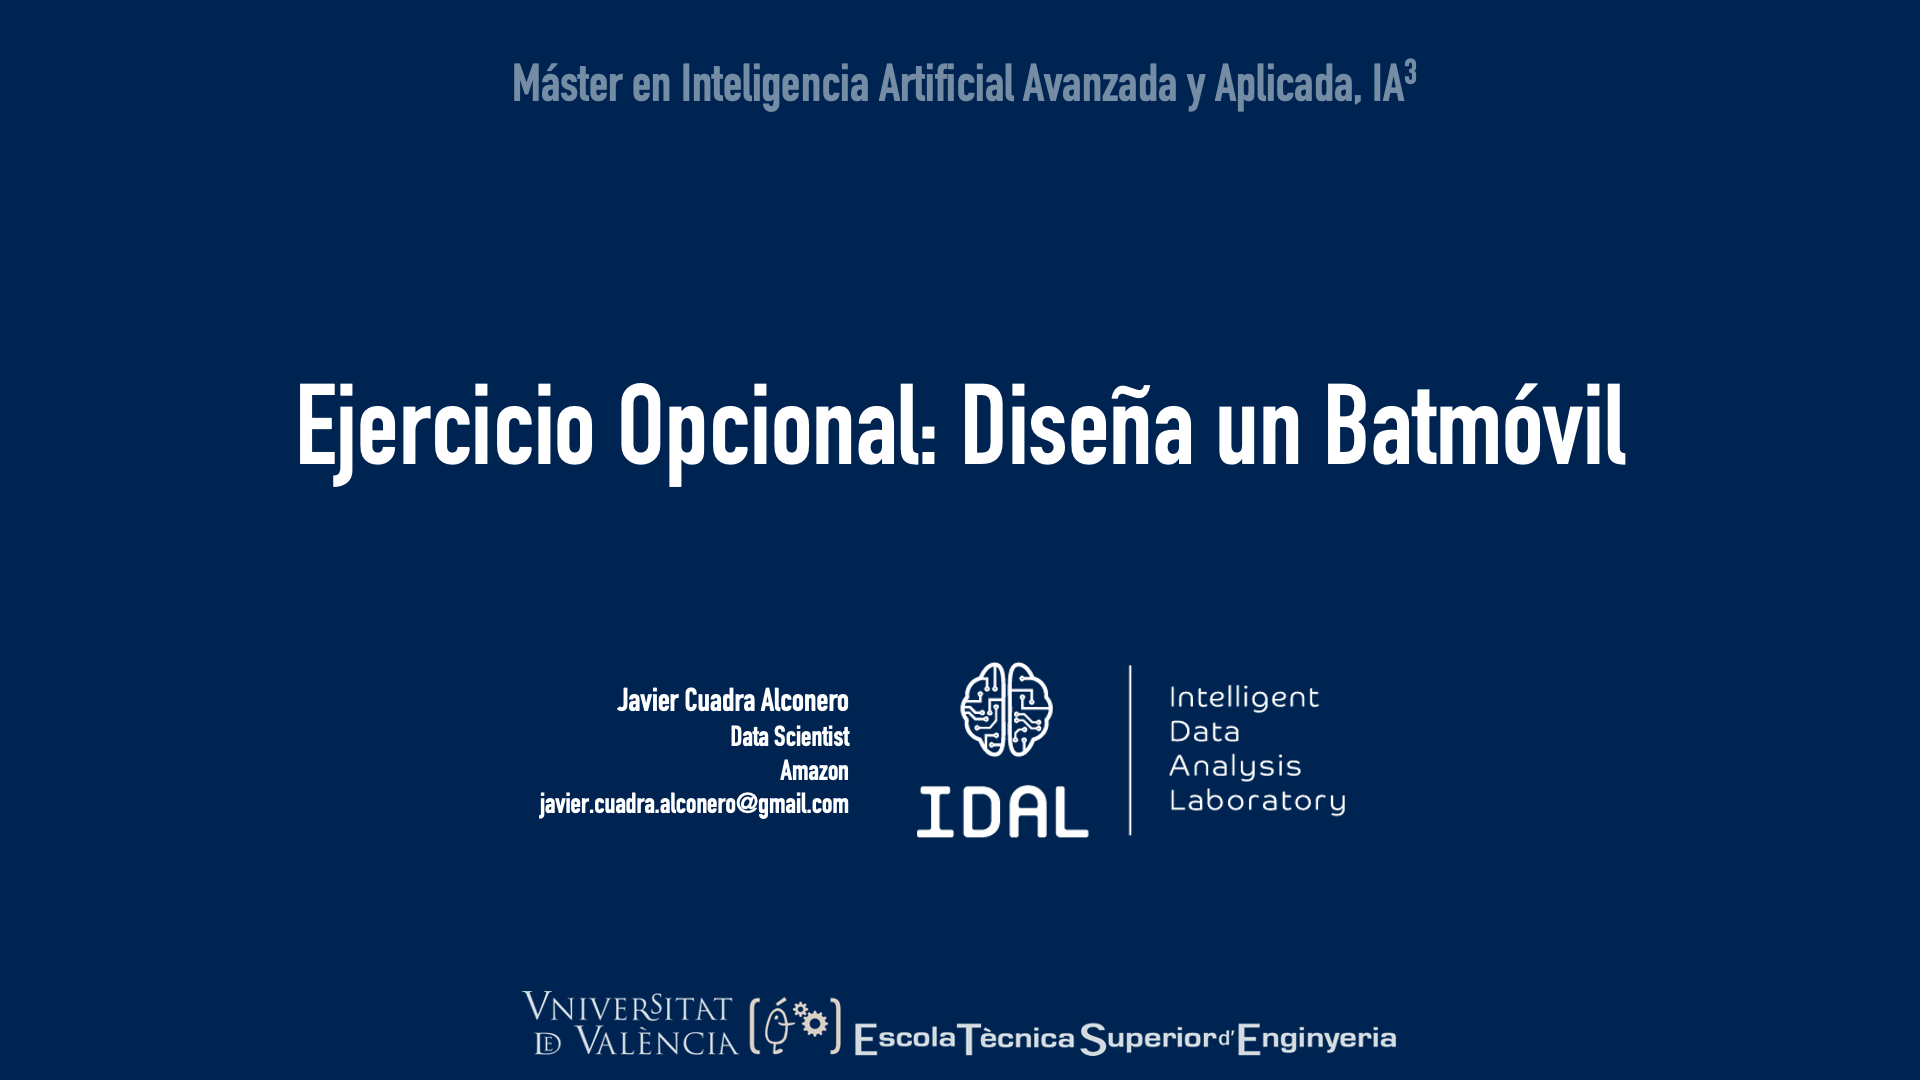

# Consideraciones:

- Se trata de un ejercicio opcional a realizar en grupos de tres
- El entregable de este ejercicio debe ser un link a vuestro cuaderno de colaboratory alojado en Github
- La evaluación del ejercicio será una ejecución del cuaderno
- Todos los métodos descritos deben imprimir un resultado en pantalla
- Aquellos que completen el sistema discreto recibirán un punto extra en este módulo
- **Se dispone de un total de dos semanas para terminar el ejercicio (aunque lo empezamos ahora)**

Este ejercicio se propone dada la importancia de la programación orientada a objetos en el lenguaje Python. Gran parte de las librerías utilizadas en ML y DL requieren de un conocimiento básico de este paradigma para poder sacarles provecho y modelar de forma apropiada. Debido a este se propone este ejercicio para motivar a los alumnos a familiarizarse con esta tecnología.

This notebook is done in collaboration between __Sergio Roldan, Anna Skorobogatova and Pablo Soriano who form DatAttack team.__

# Exercise 1
Hi Guys Cristopher Nolan is here. Don't talk about this, but I am making a new Batman movie and I need your help to design the new Batmobile. For this ocassion I would like you to design it as several Python Classes.

- Design the main Batmobile class with the following attributes: Pilot (It could be Batman or Robin), number of batrockets loaded, number of pem (this are electromagnetic pulses to counter the Joker weapons) uses left, liters of gas left in the batmobile

- Add the following methods to the Batmobile class: A method to accelerate the batmobile and drive for some distance, a method to activate the turbo and drive for some distance faster than the normal method, a method to launch a rocket to a Joker colleague, a method to launch a pem use.

- Create the following classes to interact with the Batmobile: Joker, Joker Villain, Rocket, PEM Pulse.

- The Joker and Jokker Villain class should have a parameter called KO which will turn to True when they receive a Rocket. They also have a parameter called Weapon which should turn to false if they receive a PEM Pulse. 

- The Rocket and PEM Pulse are the ammunition of the Batmobile, the car can only use the weapons if it has ammunition in the arsenal.

- Finally draw a diagram of the classes using diagram.io showing how they interact.

Se propone la siguiente distribución de la carga de trabajo:
- Un estudiante podría diseñar la clase del batmóvil. Mientras sus dos compañeros podrían desarrollar las clases relacionadas con el armamento del mismo y los distintos villanos descritos.
- Una vez desarrolladas las piezas de código por separado se procedería a la integración en equipo de todo el sistema.
- Uno de los estudiantes (aquel con menor carga en programación) desarrollaría el diagrama de la pieza de software.

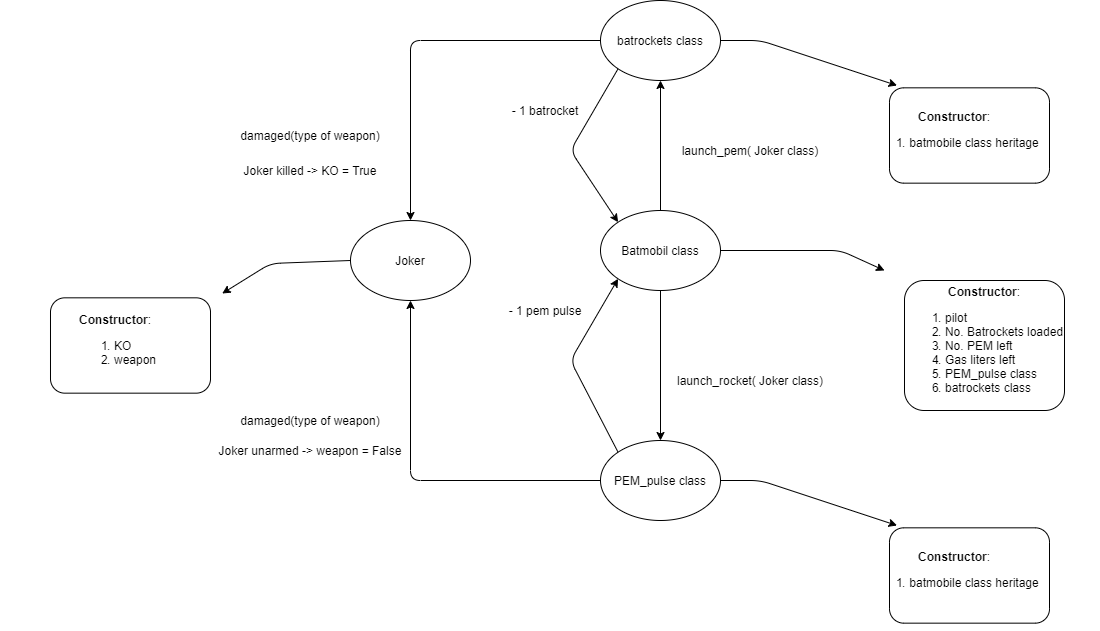

In [1]:
class Batmobile:
  def __init__(self, pilot, no_batrockets_loaded, no_pem_left, gas_liters_left):
    self.pilot = pilot
    self.no_batrockets_loaded = no_batrockets_loaded
    self.no_pem_left = no_pem_left
    self.gas_liters_left = gas_liters_left
    self.pem = PEM_pulse(self)
    self.rocket = batrockets(self)
  def drive (self):
    #Setting velocity 50m/s (180 km/h) during 10 seconds and consumption media 15L/100kms:
    if (self.gas_liters_left > 0):
      self.gas_liters_left = self.gas_liters_left - (15*0.5)/100.0
      print('\nDriving... ',self.gas_liters_left, 'L gas left\n')
    else:
      print('\nEmpty gas deposit')
  def turbo (self):
    #Setting velocity 100m/s (360 km/h) during 10 seconds and consumption media 30L/100kms:
    if (self.gas_liters_left > 0):
      self.gas_liters_left = self.gas_liters_left - (30*1.0)/100.0
      print('\n¡¡TURBO ON!! ',self.gas_liters_left, 'L gas left\n')
    else:
      print('\nEmpty gas deposit')
  def launch_rocket (self,target):
    self.rocket.launch(target)
  def launch_pem (self, target):
    self.pem.launch(target)
  def arsenal(self):
    print('\nArsenal available:\nRockets: ', self.no_batrockets_loaded, '\nPEM pulse', self.no_pem_left)

#Batmobile weapons

class PEM_pulse:
  def __init__(self, batmobile):
    self.batmobile = batmobile
  def launch(self, target):
    if self.batmobile.no_pem_left > 0:
      self.batmobile.no_pem_left = self.batmobile.no_pem_left -1
      print('\nPEM pulse fire to ' ,target.name, ' PEM left ', self.batmobile.no_pem_left)
      target.damaged('PEM')
    else:
      print('\nNo PEM pulse available')

class batrockets:
  def __init__(self, batmobile):
    self.batmobile = batmobile
  def launch(self, target):
    if self.batmobile.no_batrockets_loaded > 0:
      self.batmobile.no_batrockets_loaded = self.batmobile.no_batrockets_loaded -1
      print('\nRocket fire to ' ,target.name, ' rockets left ', self.batmobile.no_batrockets_loaded)
      target.damaged('rocket')
    else:
      print('\nNo rockets available')

#Batmobile targets

class Joker:
  def __init__(self, KO, weapon):
    self.name='Joker'
    self.KO = KO 
    self.weapon = weapon
  def damaged (self, batmobile_weapon):
    if batmobile_weapon == 'PEM':
      if self.weapon == True:
        self.weapon = False
        print('\nJoker weapon deactivated')
      else:
          print('\nJoker weapon already deactivated')
    elif batmobile_weapon == 'rocket':
      if self.KO == False:
        self.KO = True
        print('\nJoker killed')
      else:
          print('\nJoker already killed')
class Joker_Villain:
  def __init__(self, KO, weapon):
    self.name='Joker Villain'
    self.KO = KO 
    self.weapon = weapon
  def damaged (self, batmobile_weapon):
    if batmobile_weapon == 'PEM':
      if self.weapon == True:
        self.weapon = False
        print('\nJoker villain weapon deactivated')
      else:
          print('\nJoker villain weapon already deactivated')
    elif batmobile_weapon == 'rocket':
      if self.KO == False:
        self.KO = True
        print('\nJoker villain killed')
      else:
          print('\nJoker villain already killed')

In [2]:
#Initialization
batmobil = Batmobile( pilot = 'Batman', no_batrockets_loaded=3, no_pem_left=1, gas_liters_left=70)
joker= Joker(KO=False, weapon=True)

In [3]:
#Simulation
batmobil.drive()
batmobil.turbo()
batmobil.launch_pem(joker)
batmobil.turbo()
batmobil.launch_rocket(joker)
batmobil.drive()
batmobil.launch_rocket(joker)
batmobil.arsenal()


Driving...  69.925 L gas left


¡¡TURBO ON!!  69.625 L gas left


PEM pulse fire to  Joker  PEM left  0

Joker weapon deactivated

¡¡TURBO ON!!  69.325 L gas left


Rocket fire to  Joker  rockets left  2

Joker killed

Driving...  69.25 L gas left


Rocket fire to  Joker  rockets left  1

Joker already killed

Arsenal available:
Rockets:  1 
PEM pulse 0
